# Google store data
## Intro
This anlysis used the dataset resources from Kaggle [Database of Android Apps](https://www.kaggle.com/orgesleka/android-apps) , [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) and [Mobile App Store ( 7200 apps)](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

I also used the analysis method from [All that you need to know about the Android market](https://www.kaggle.com/lava18/all-that-you-need-to-know-about-the-android-market) and [How to get "High" Rating on Play Store](https://www.kaggle.com/tanetboss/how-to-get-high-rating-on-play-store).

I will use these three datasets to understand how rating is affacted in Google Play market (and iOS app store)

gd represents Dataset from [Database of Android Apps](https://www.kaggle.com/orgesleka/android-apps)

ad represents Dataset from [Mobile App Store ( 7200 apps)](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('colorblind')
sns.set(rc={'figure.figsize':(25,15)})
plt.style.use('ggplot')

#import plotly
#plotly.offline.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [8]:
gd = pd.read_csv('https://tufts.box.com/shared/static/8utsdmfx97s0o1j63l1ogwr3822coo6l.csv')
ad = pd.read_csv('https://tufts.box.com/shared/static/apy20t1jghwu4vxho9p3mar23vmgfw67.csv')


I inputed two different datasets on Google Play app and one dataset on iOS app store

In [9]:
#print(gd.dtypes)
gd.drop_duplicates(subset='App', inplace=True)
gd = gd[gd['Android Ver'] !=np.nan]
gd = gd[gd['Android Ver'] !='NAN']
gd = gd[gd['Installs'] != 'Free']
gd = gd[gd['Installs'] != 'Paid']

In [10]:
print('Number of apps in the first dataset : ' , len(gd))
gd.sample(5)

Number of apps in the first dataset :  9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1189,Dunkin' Donuts,FOOD_AND_DRINK,4.2,68103,66M,"1,000,000+",Free,0,Everyone,Food & Drink,"June 20, 2018",5.0.0,4.4 and up
7634,VCalendar - VenkatRama and Co,LIFESTYLE,4.3,87,3.9M,"10,000+",Free,0,Everyone,Lifestyle,"March 16, 2018",1.2,4.1 and up
4508,Q Avatar Pro,FAMILY,4.8,4,3.6M,100+,Paid,$1.49,Teen,Entertainment,"March 4, 2017",1.3.5,2.3 and up
3874,Rope Hero Return of a Legend,GAME,4.3,9951,96M,"1,000,000+",Free,0,Mature 17+,Arcade,"August 26, 2016",1.0,2.3 and up
6986,Driving Zone,GAME,4.2,51791,57M,"1,000,000+",Free,0,Everyone,Racing,"June 6, 2018",1.53,4.1 and up


In [11]:
ad = ad[ad['user_rating'] !=0]
ad = ad[ad['user_rating'] !=0.0]
ad = ad[ad['user_rating'] !='NaN']
ad = ad[ad['user_rating'] !=np.nan]
print('Number of apps in the third dataset : ' , len(ad))
ad.sample(7)

Number of apps in the third dataset :  6268


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
555,631,395042892,Instant Heart Rate+: Heart Rate & Pulse Monitor,189514752,USD,4.99,10158,475,4.5,4.5,5.72,4+,Health & Fitness,37,0,31,1
6356,9166,1124395796,All Star Quarterback 17 - Football Lifestyle Sim,110787584,USD,0.00,521,131,4.5,4.5,1.4,12+,Games,37,5,1,1
5050,6625,1069803052,Toca Dance,133085184,USD,2.99,186,71,4.5,4.5,1.1,4+,Education,38,5,18,1
6958,10421,1161496947,Baby Bottle Challenge - Water Bottle Flip,61094912,USD,0.00,152,56,3.5,3.5,3,4+,Games,38,2,1,1
2681,3191,880047117,Angry Birds 2,446483456,USD,0.00,109104,3636,4.0,4.5,2.13.0,4+,Games,37,5,10,1
646,743,409890132,Slingo Supreme HD,60013568,USD,0.99,4094,15,4.5,3.5,2.1.46,4+,Games,24,5,1,1
2061,2393,666202151,movieStudio-Video Editor&Slideshow Maker(pro),99328000,USD,2.99,1033,54,4.5,4.5,5.7,4+,Utilities,40,1,12,1


## Datasheet
### Data link
This anlysis used the dataset resources from Kaggle [Database of Android Apps](https://www.kaggle.com/orgesleka/android-apps) and [Mobile App Store ( 7200 apps)](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).
### Motivation for Dataset Creation
#### First dataset
This dataset is originally created for individual research that targets on Google Play Store. 
As described by its author, this dataset is made to drive app-making businesses to success and give actionable insights to developer. 
Hundreds of people in Kaggle have used it for different kinds of tasks. For example: App market breakdown, Distribution of paid and free apps across categories and etc. The results of these tasks are posted on the kernels of this dataset (for example: https://www.kaggle.com/lava18/all-that-you-need-to-know-about-the-android-market), some of which have the detailed steps so that everyone can reproduce the result. 
This is not mentioned in the project whether it is funded or not. But from my understanding, it is just individual behavior. 

#### Second dataset
The ever-changing mobile landscape is a challenging space to navigate. . The percentage of mobile over desktop is only increasing. Android holds about 53.2% of the smartphone market, while iOS is 43%. To get more people to download your app, you need to make sure they can easily find your app. Mobile app analytics is a great way to understand the existing strategy to drive growth and retention of future user.

With million of apps around nowadays, the following data set has become very key to getting top trending apps in iOS app store. This data set contains more than 7000 Apple iOS mobile application details. The data was extracted from the iTunes Search API at the Apple Inc website. R and linux web scraping tools were used for this study.

### Dataset Composition

#### First dataset
Instances: App, Category, Rating, Reviews, Size, Installs, Free or paid, Price, Content Rating, Genres, Last updated date, Current Version, Android Version
#### Second dataset
1. "id" : App ID
2. "track_name": App Name
3. "size_bytes": Size (in Bytes)
4. "currency": Currency Type
5. "price": Price amount
6. "rating_count_tot": User Rating counts (for all version)
7. "rating_count_ver": User Rating counts (for current version)
8. "user_rating" : Average User Rating value (for all version)
9. "user_rating_ver": Average User Rating value (for current version)
10. "ver" : Latest version code
11. "cont_rating": Content Rating
12. "prime_genre": Primary Genre
13. "sup_devices.num": Number of supporting devices
14. "ipadSc_urls.num": Number of screenshots showed for display
15. "lang.num": Number of supported languages
16. "vpp_lic": Vpp Device Based Licensing Enabled

### Data Collection Process
#### First dataset
the Data is scrapped from the website by Kaggle User: Lavanya Gupta on September, 2018. These data is public and observable from Google Play Store App and website. The data is a sample of an original 2.6 million data. 
#### Second dataset
The data was extracted from the iTunes Search API at the Apple Inc website on July, 2017. R and linux web scraping tools were used for this study. The data is public and observable from App store. This data is a sample of an original 2.1 million data.  

### Dataset Distribution
#### First dataset
The dataset is distributed through API and under CC3.0.
#### Second dataset
Copyright (c) 2018 Ramanathan Perumal

### Dataset Maintenance
#### First dataset 
Kaggle User: Lavanya Gupta is the main maintener. The dataset is updated every month. There is no erratum. 

#### Second dataset
There had been 7 updates to the dataset by Kaggle user: Ramanathan, but there is no change in the past year. 


## Data Cleaning
###  First dataset(gd)
1. Convert all size to MB (KB devided by 10^3) and remove "M" and "K" to make it an number
2. Remove "+" of installs and make it int
3. Remove "$" of Price and make it float
4. Change Type "Paid" and "Free" to bool "True" and "False"
5. Change "Reviews" to int

In [12]:
gd['Installs'] = gd['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
gd['Installs'] = gd['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)
# gd['Installs'] = gd['Installs'].str.replace('+','')
gd['Installs'] = gd['Installs'].apply(lambda x: int(x))
# gd['Installs'] = pd.to_numeric(gd['Installs']) should be faster

Using Excel "Filter" I found out apart from exact size, there is "Varies with device". We need to change it to NaN to change the whole column into number

In [13]:
gd['Size'] = gd['Size'].apply(lambda x: str(x).replace('Varies with device','NaN' ) if 'Varies with device' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: str(x).replace('M','' ) if 'M' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: str(x).replace(',','' ) if 'M' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: float(x))
gd.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [14]:
gd['Price'] = gd['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else x)
gd['Price'] = gd['Price'].apply(lambda x: float(x))
gd.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [15]:
# gd['Type'] = gd['Type'].apply(lambda x: str(x).replace('Free','0') if 'Free' in str(x) else x)
# gd['Type'] = gd['Type'].apply(lambda x: str(x).replace('Paid','1') if 'Paid' in str(x) else x)
# gd['Type'] = gd['Type'].apply(lambda x: bool(x))
# gd.dtypes
# pd.get_dummies(gd['Type'])

In [16]:
# suggestion
# gd['Type'].unique()
# gd.join(pd.get_dummies(gd['Type']))

In [17]:
gd['Reviews'] = gd['Reviews'].apply(lambda x: int(x))

### Second dataset(ad)

In [18]:
ad.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

On the type of the variables, there is nothing need to be cleaned. But I'd like to change size_bytes to MB in order to align with other dataset

In [19]:
ad['size_bytes'] = ad['size_bytes'].apply(lambda x: float(x) / 1000000)
ad.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100.788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158.578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92.774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


I want to add indentifor like "iOS" in the column to classify them

In [20]:
ad = ad.assign(platform = 'iOS')
ad.sample(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,platform
1270,1475,517642765,Weaphones: Firearms Simulator Volume 1,61.468672,USD,2.99,1478,72,4.5,4.5,2.3.1,12+,Games,43,5,16,1,iOS
5469,7353,1085464876,Room Escape [SECRET CODE 2],68.177920,USD,0.00,20,3,5.0,5.0,1.1,4+,Games,38,5,2,1,iOS
3047,3642,924589795,Highrise - Your Avatar Community,116.480000,USD,0.00,2011,15,4.0,4.5,2.2.3,12+,Social Networking,37,5,15,1,iOS
959,1102,463431091,Railway Route Search,46.950400,USD,0.00,5,0,3.0,0.0,3.17.1,4+,Navigation,37,0,1,1,iOS
2960,3537,915223450,mazec - 手書き日本語入力ソフト,51.886080,USD,8.99,5,0,3.5,0.0,2.1.3,4+,Utilities,37,5,2,1,iOS


It works! Now I will do the same for the other datasets as well

In [21]:
gd = gd.assign(platform='Android')

## Merging datasets

First, I will try to merge ad and pd using the app name. But becuase they don't have the same column name(one is "App" and another one is track_name), I need to change them to the same first)

In [22]:
ad.rename(columns={'track_name':'App'}, inplace=True)
ad.head()

,Unnamed: 0,id,App,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,platform
0,1,281656475,PAC-MAN Premium,100.788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,iOS
1,2,281796108,Evernote - stay organized,158.578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,iOS
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,iOS
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,iOS
4,5,282935706,Bible,92.774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,iOS


Now, the column of App name is the same now, we can start to merge them

In [23]:
md = pd.merge(gd, ad, on='App', how='inner')
print('Number of apps in the joint dataset : ' , len(md))

Number of apps in the joint dataset :  328


In [24]:
md.dtypes

App                  object
Category             object
Rating              float64
Reviews               int64
Size                float64
Installs              int64
Type                 object
Price               float64
Content Rating       object
Genres               object
Last Updated         object
Current Ver          object
Android Ver          object
platform_x           object
Unnamed: 0            int64
id                    int64
size_bytes          float64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
platform_y           object
dtype: object

Looks like we got Lucky! There are 328 apps in both datasets. I will save it for further analysis

Let's mess around a little bit by adding two dataset through outer method to save all the data we want


In [25]:
gd1=pd.DataFrame(data = (gd.App, gd.Category, gd.Price, gd.Rating, gd.platform)).T

gd1.head()

,App,Category,Price,Rating,platform
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,0,4.1,Android
1,Coloring book moana,ART_AND_DESIGN,0,3.9,Android
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,0,4.7,Android
3,Sketch - Draw & Paint,ART_AND_DESIGN,0,4.5,Android
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,0,4.3,Android


Let's do the same thing for the app store one and unified the name

In [26]:
ad1=pd.DataFrame(data=(ad.App, ad.prime_genre, ad.price, ad.user_rating, ad.platform)).T
ad1.sample(5)

,App,prime_genre,price,user_rating,platform
2930,Heroes and Castles 2,Games,1.99,4.5,iOS
7171,Room Escape Game - Santa's Room,Games,0,5,iOS
1000,Infinite Flight - Flight Simulator,Games,4.99,4.5,iOS
3274,Jet: Online Shopping Deals & Bulk Wholesale Pr...,Shopping,0,4.5,iOS
828,Magic Jigsaw Puzzles,Games,0,4.5,iOS


In [27]:
ad1.rename(columns={'prime_genre':'Category', 'price':'Price', 'user_rating':'Rating'}, inplace=True)
ad1.sample(5)

,App,Category,Price,Rating,platform
3008,ContactsXL 2016,Productivity,0.99,2.5,iOS
2224,FINAL FANTASY VI,Games,14.99,4.5,iOS
1718,PicsArt Photo Studio: Collage Maker & Pic Editor,Photo & Video,0,4.5,iOS
176,Moto X Mayhem,Games,0.99,4,iOS
2349,航旅纵横PRO-官方航班动态、手机值机、机票,Travel,0.99,4.5,iOS


In [28]:
md3=pd.merge(gd1, ad1, how='outer')
md3.sample(10)

,App,Category,Price,Rating,platform
9332,Rope Hero: Vice Town,GAME,0.00,4.4,Android
4113,Blur Image - DSLR focus effect,PHOTOGRAPHY,0.00,3.9,Android
15350,PPTAN,Games,0.99,5.0,iOS
10353,Temple Run,Games,0.00,4.5,iOS
1965,My Cancer Coach,MEDICAL,0.00,4.3,Android
2087,"AliExpress - Smarter Shopping, Better Living",SHOPPING,0.00,4.6,Android
1426,Pokémon GO,GAME,0.00,4.1,Android
8834,PeopleTV - Watch Celebrity News,FAMILY,0.00,4.3,Android
14079,【2017年の運勢決定版】ゲッターズ飯田の占い,Entertainment,0.00,4.0,iOS
9186,Theme For Galaxy Note FE,PERSONALIZATION,0.00,NaN,Android


In [29]:
md3.dtypes

App          object
Category     object
Price       float64
Rating      float64
platform     object
dtype: object

## Basic EDA

In [30]:
# df_plot = gd[['Rating', 'Size', 'Installs', 'Reviews', 'Type', 'Price']]
# df_plot['Installs'] = np.log(df_plot['Installs'])
# df_plot['Reviews'] = pd.to_numeric(df_plot['Reviews'])
# df_plot['Reviews'] = df_plot['Reviews'].loc[df_plot['Reviews'] != 0].dropna()
# df_plot['Reviews'] = np.log10(df_plot['Reviews'])
# df_plot.head()
# sns.pairplot(data=df_plot, hue='Type')

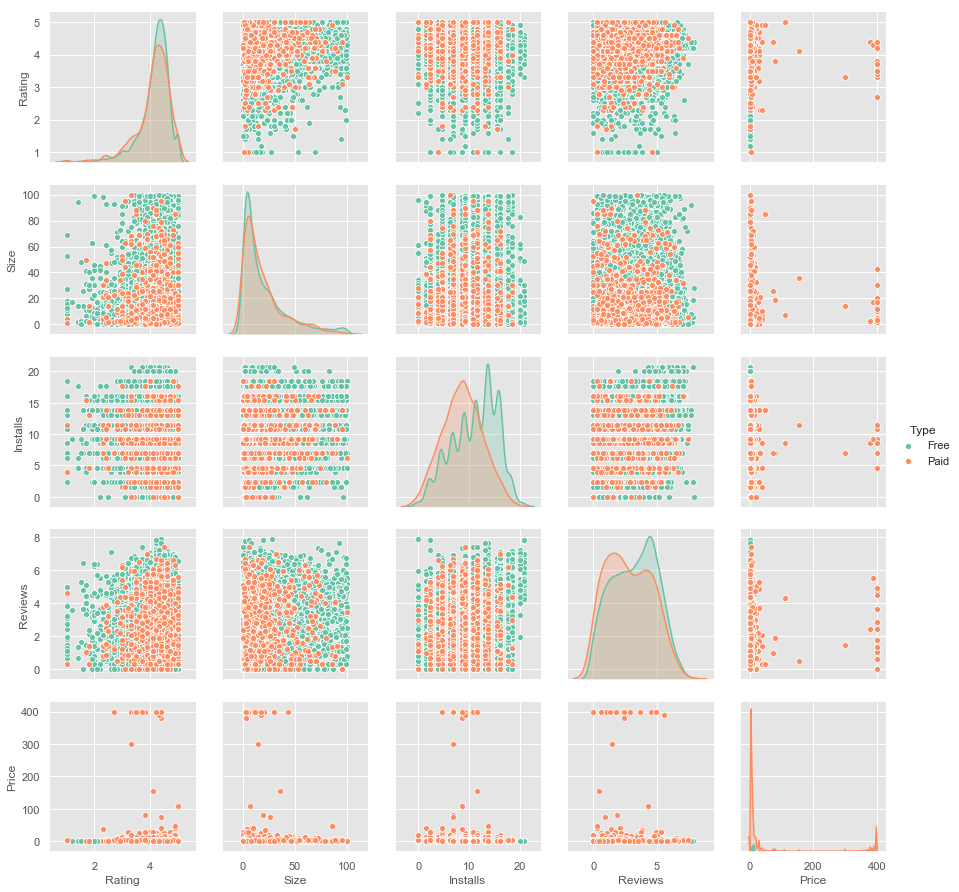

In [31]:
x = gd['Rating'].dropna()
y = gd['Size'].dropna()
z = gd['Installs'][gd.Installs!=0].dropna()
p = gd['Reviews'][gd.Reviews!=0].dropna()
t = gd['Type'].dropna()
price = gd['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)),
                              columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']),
                                 hue='Type', palette="Set2")

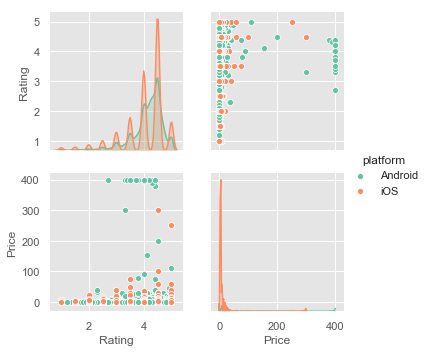

In [32]:
x = md3['Rating'].dropna()
price = md3['Price']
p= md3['platform'].dropna()

p = sns.pairplot(pd.DataFrame(list(zip(x, p, price)),
                              columns=['Rating','platform','Price']),
                              hue='platform', palette="Set2" )

This is the basic exploratory analysis to look for any evident patterns or relationships between the features. 

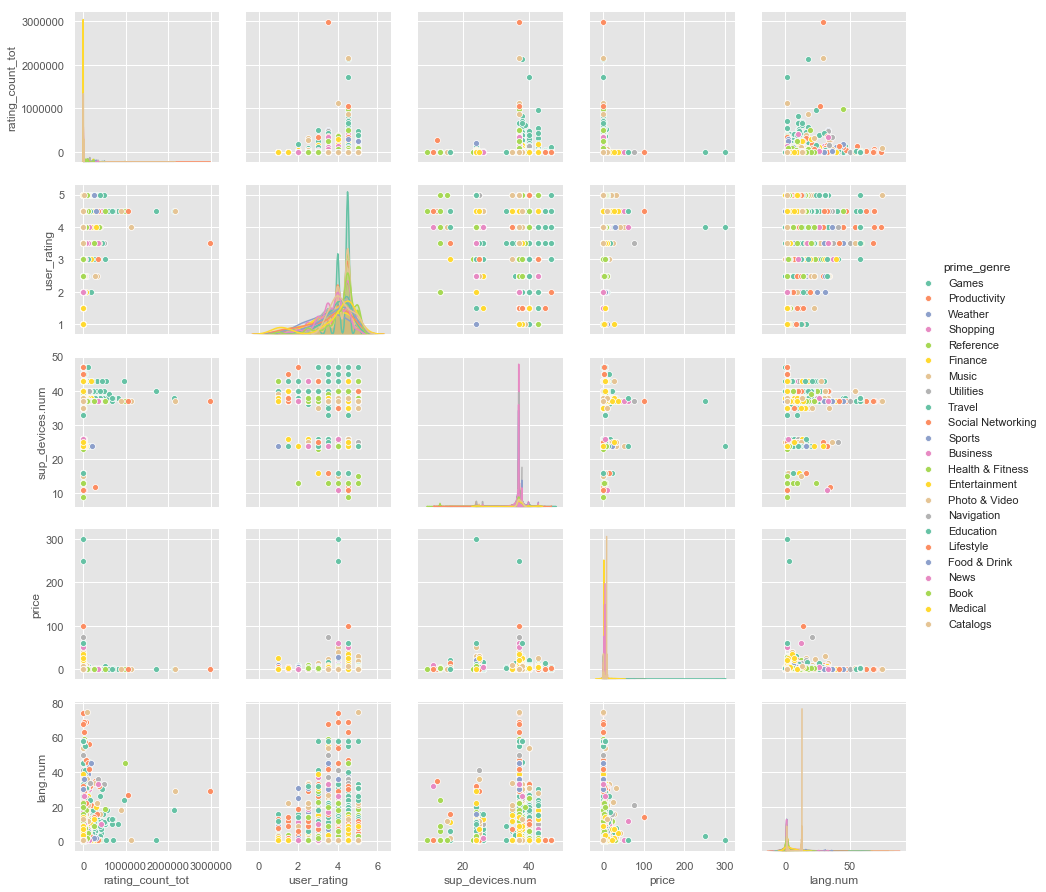

In [48]:
numCol = ad[['rating_count_tot', 'user_rating', 'sup_devices.num', 'price', 'lang.num', 'prime_genre']]
sns.pairplot(data = numCol, dropna=True, hue='prime_genre',palette='Set2')

## More analysis
Then, I want to know the ratio of different categories. 

([<matplotlib.patches.Wedge at 0x1a214157f0>,
 [Text(2.1996731345008893, 0.03792230682636615, 'BEAUTY'),
  Text(2.1969467832441265, 0.11586557553167197, 'COMICS'),
  Text(2.1910128544825023, 0.19865213689371095, 'PARENTING'),
  Text(2.181221478321499, 0.28683246418244773, 'ART_AND_DESIGN'),
  Text(2.1673935047217, 0.37736639448974085, 'EVENTS'),
  Text(2.1482784009100238, 0.47423613546784094, 'HOUSE_AND_HOME'),
  Text(2.1220291520634977, 0.5805103597634363, 'WEATHER'),
  Text(2.0882858770656516, 0.6921431178940837, 'LIBRARIES_AND_DEMO'),
  Text(2.0471058101208723, 0.8058274022204553, 'AUTO_AND_VEHICLES'),
  Text(1.994338891552901, 0.9287692854738183, 'ENTERTAINMENT'),
  Text(1.9249164333393716, 1.0652214439542764, 'FOOD_AND_DRINK'),
  Text(1.839528155288239, 1.2067046721969088, 'EDUCATION'),
  Text(1.735438090766351, 1.352129665792909, 'MAPS_AND_NAVIGATION'),
  Text(1.5984112837193938, 1.5116485597117209, 'VIDEO_PLAYERS'),
  Text(1.4250959011943463, 1.6760374913465017, 'DATING'),
  Tex

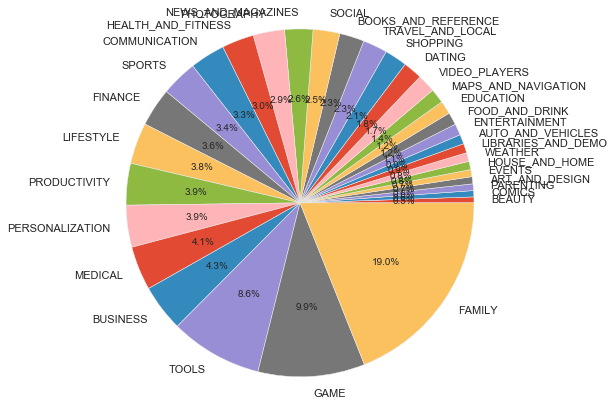

In [33]:

number_of_apps_in_category = gd['Category'].value_counts().sort_values(ascending=True)


plt.pie(x = number_of_apps_in_category.values, 
        labels = number_of_apps_in_category.index, 
        radius = 2, autopct='%1.1f%%'
        )


([<matplotlib.patches.Wedge at 0x1a21567898>,
 [Text(4.399986183302243, 0.011026638171551362, 'Catalogs'),
  Text(4.399502607991854, 0.06615740527619002, 'Medical'),
  Text(4.396374441936795, 0.17858265953034488, 'Navigation'),
  Text(4.385143804239611, 0.36126695965580863, 'Food & Drink'),
  Text(4.360068921975563, 0.5914380742079927, 'Reference'),
  Text(4.322509563718798, 0.8221381097841969, 'Business'),
  Text(4.269040231565712, 1.0655024642267954, 'News'),
  Text(4.193952975125575, 1.330698479158723, 'Book'),
  Text(4.097606874561272, 1.6030027765254191, 'Weather'),
  Text(3.977965296598087, 1.8803702026625762, 'Travel'),
  Text(3.8341776716131952, 2.158490579665062, 'Finance'),
  Text(3.6340894120109932, 2.4806035849183155, 'Sports'),
  Text(3.357644883787428, 2.8436281111242576, 'Shopping'),
  Text(3.0259327908076328, 3.1943279020030384, 'Lifestyle'),
  Text(2.6083284417841086, 3.543532522749027, 'Music'),
  Text(2.110278994670017, 3.860922501767486, 'Social Networking'),
  Text

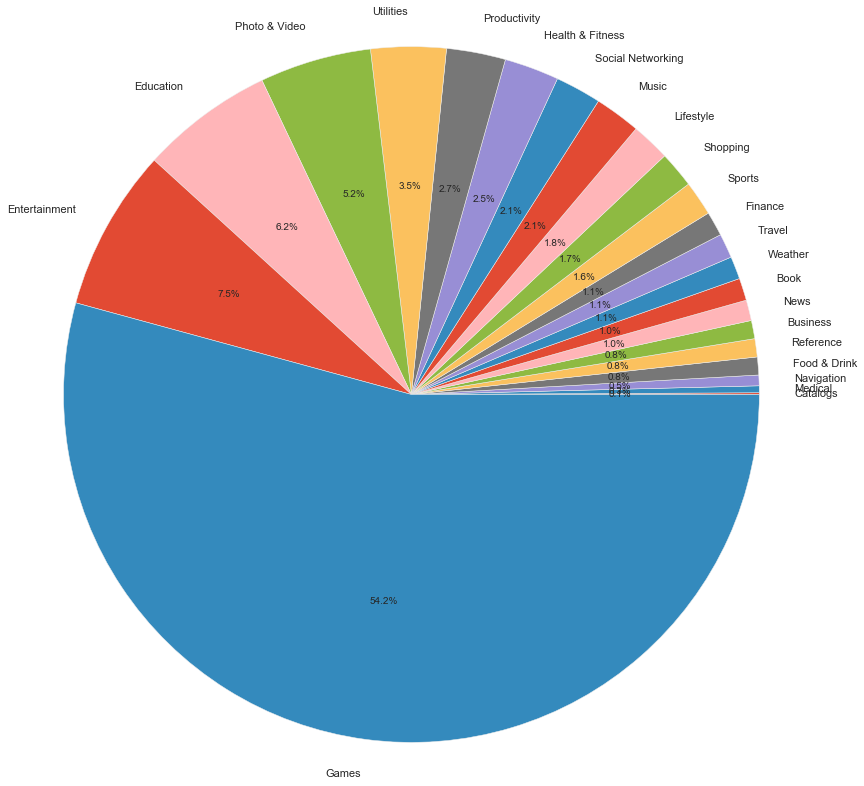

In [34]:
number_of_apps_in_category = ad['prime_genre'].value_counts().sort_values(ascending=True)


plt.pie(x = number_of_apps_in_category.values, 
        labels = number_of_apps_in_category.index, 
        radius = 4, autopct='%1.1f%%'
        )

From the pie chart above, I know Family is the biggest category followed by Game and Tools. 
Then, I want to know what the general rating situation is

In [35]:
gd['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

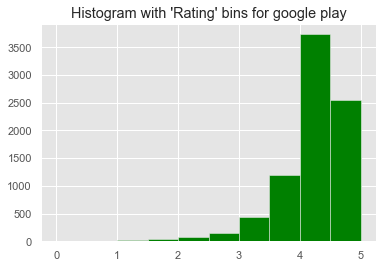

In [36]:
# g = sns.kdeplot(gd.Rating, color="Green", shade = True)
# g.set_xlabel("Rating")
# g.set_ylabel("Frequency")
# plt.title('Distribution of Rating',size = 15)

plt.hist(gd.Rating, bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4,4.5,5], color = 'green')  # arguments are passed to np.histogram
plt.title("Histogram with 'Rating' bins for google play")
plt.show()

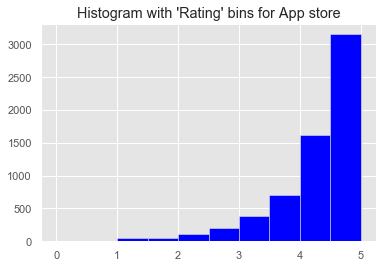

In [37]:
plt.hist(ad.user_rating, bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4,4.5,5], color = 'Blue')  # arguments are passed to np.histogram
plt.title("Histogram with 'Rating' bins for App store")
plt.show()

Distribute them into different categories

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

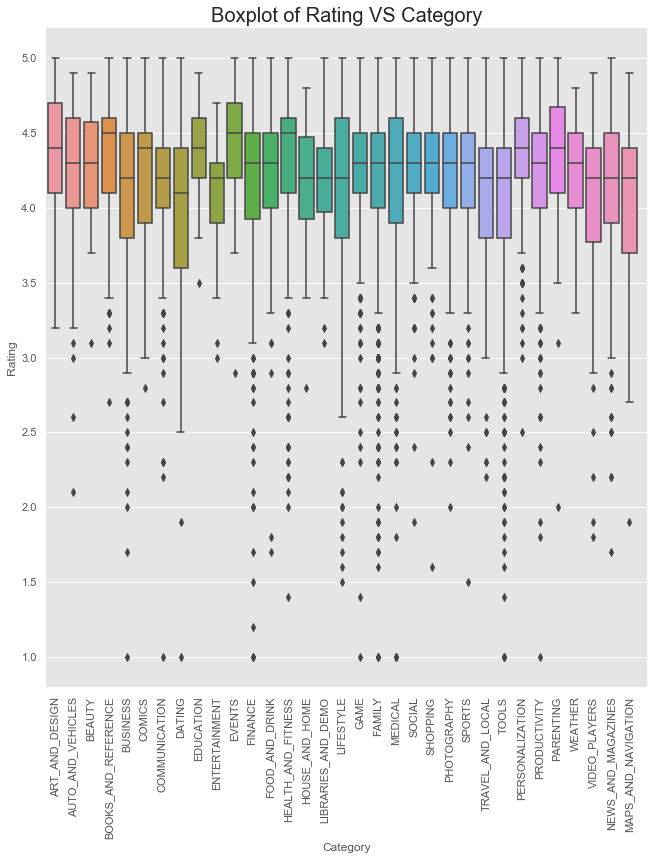

In [38]:
g = sns.catplot(x="Category",y="Rating",data=gd, kind="box", height = 10)
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

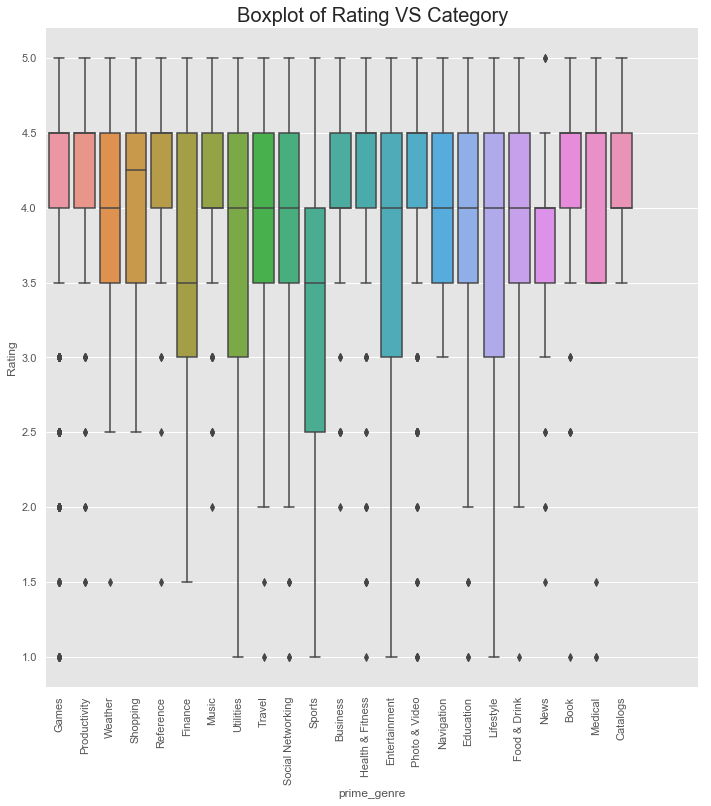

In [39]:
g = sns.catplot(x="prime_genre",y="user_rating",data=ad, kind="box", height = 10)
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,26))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

Then, I want to know the correlation between size and the rating

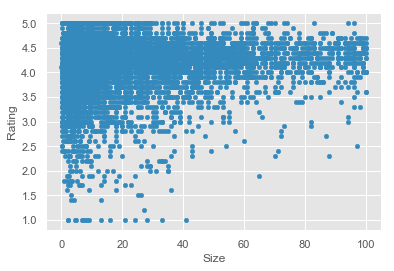

In [40]:
gd.plot.scatter('Size', 'Rating')

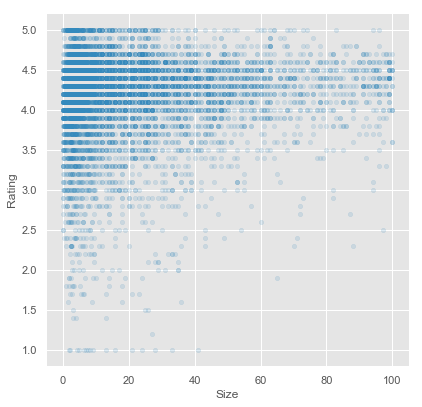

In [41]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
gd.plot.scatter('Size', 'Rating', alpha=0.15,ax=ax)

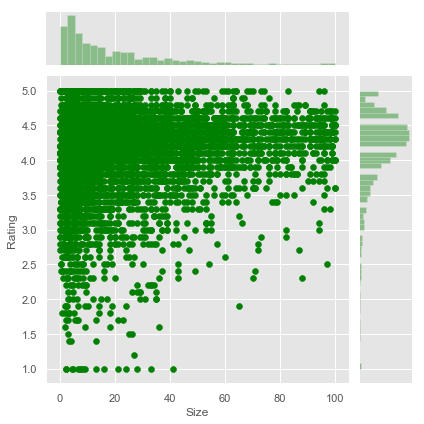

In [42]:

sns.jointplot(data=gd, y='Rating', x='Size', color='green')

Looks like most highly rated apps is around 2-40 MB

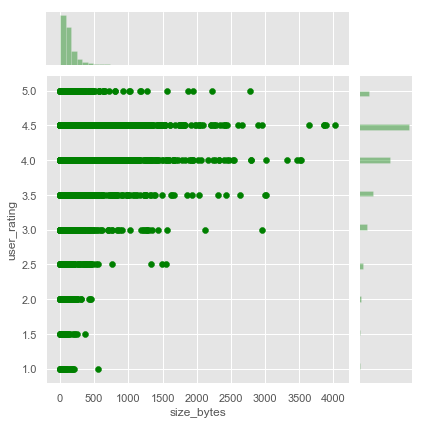

In [43]:

sns.jointplot(data=ad, y='user_rating', x='size_bytes', color='green')

Looks like most of the apps are in the range of (0-500M) let's zoom it in to see more clearly

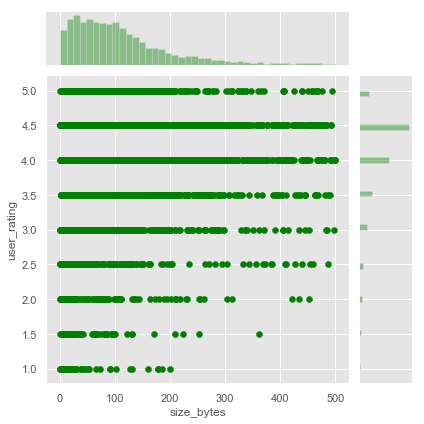

In [44]:
ad2 = ad[ad['size_bytes']<500]
sns.jointplot(data=ad2, y='user_rating', x='size_bytes', color='green')

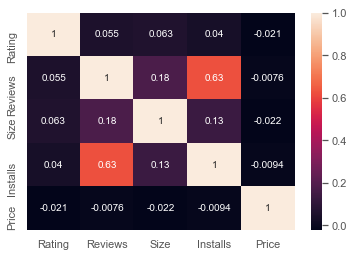

In [45]:
#df['Installs'].corr(df['Reviews'])#df['Insta 
#print(np.corrcoef(l, rating))

corrmat = gd.corr()
#f, ax = plt.subplots()
p =sns.heatmap(corrmat, annot=True)

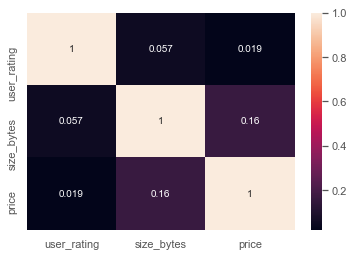

In [46]:
ad1 = pd.DataFrame(data=(ad.user_rating, ad.size_bytes, ad.price)).T
corrmat = ad1.corr()
#f, ax = plt.subplots()
p =sns.heatmap(corrmat, annot=True)

## Machine Learning

I don't know how to creat a machine learning model yet. This is just a placeholder

In [70]:
#Excluding genres
from sklearn import svm
#Integer encoding

X = md3.Price
y = md3.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model2 = svm.SVR()
model2.fit(X_train,y_train)

Results2 = model2.predict(X_test)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2, name = 'SVM - Integer'),ignore_index = True)

#dummy based


X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

model2 = svm.SVR()
model2.fit(X_train_d,y_train_d)

Results2_d = model2.predict(X_test_d)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results2_d, name = 'SVM - Dummy'),ignore_index = True)

ValueError: Expected 2D array, got 1D array instead:
array=[0.   0.   0.   ... 0.   0.99 0.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.